# Predicting TTC(Toronto Transit Commission) Bus delays

                         Advance Python Project
                           
                           
                           BY
                            
                            
                            
                            
                           Akash
                           Akshitha
                           Jagadeesh
                           Kameswara sai praneeth
                           Sathwick

In [1]:
import numpy as np # this module is imported for numerical computations
import pandas as pd # this module is imported for data manipulation and analysis
import matplotlib.pyplot as plt # this module is imported for data visualization
import seaborn as sns # this module is imported for data visualization
import warnings
warnings.filterwarnings('ignore') # ignoring warnings

In [2]:
df = pd.read_csv("ttc-bus-delay-data-2022.csv") # loading csv file into dataframe

# Data preprocessing and cleaning

In [3]:
df.shape

(27351, 10)

In [5]:
df.head() # number of rows and records

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0


In [12]:
df.head() # displaying first five records of the dataframe

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0


In [13]:
df.tail()  # displays the last five rows of the dataframe

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
27346,30-Jun-22,123,00:45,Thursday,SHERWAY GARDENS RD,Operations - Operator,27,54,E,8088
27347,30-Jun-22,102,01:08,Thursday,WARDEN AND DANFORTH,Operations - Operator,30,60,S,3416
27348,30-Jun-22,66,01:15,Thursday,UNKNOWN,Operations - Operator,30,30,NaN,0
27349,30-Jun-22,32,01:33,Thursday,RENFORTH STATION,Cleaning - Unsanitary,18,36,E,1202
27350,30-Jun-22,32,01:55,Thursday,EGLINTON AND DUPLEX,Cleaning - Unsanitary,8,16,W,1265


In [14]:
df.info() # displays the total non null counts and datatype of each column in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27351 entries, 0 to 27350
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       27351 non-null  object
 1   Route      27187 non-null  object
 2   Time       27351 non-null  object
 3   Day        27351 non-null  object
 4   Location   27351 non-null  object
 5   Incident   27351 non-null  object
 6   Min Delay  27351 non-null  int64 
 7   Min Gap    27351 non-null  int64 
 8   Direction  21774 non-null  object
 9   Vehicle    27351 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.1+ MB


In [15]:
df.columns # returns the list of all columns in the datafarme

Index(['Date', 'Route', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Direction', 'Vehicle'],
      dtype='object')

#Data preprocessing and cleaning

In [16]:
df.isnull().sum() # displaying the total missing counts of each column

Date            0
Route         164
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    5577
Vehicle         0
dtype: int64

In [17]:
df.isnull().mean() # displaying the missing values percentage of each column

Date         0.000000
Route        0.005996
Time         0.000000
Day          0.000000
Location     0.000000
Incident     0.000000
Min Delay    0.000000
Min Gap      0.000000
Direction    0.203905
Vehicle      0.000000
dtype: float64

# Handling this missing values

In [18]:
# since Direction column having lot of missing values and We have already the Route column so i am going to drop this Direction column using drop()method.
df.drop('Direction', axis=1, inplace=True)


In [19]:
df = df.dropna(subset=['Route']) # dropping teh record which os having the null values in the Route column


In [20]:
df.isnull().mean() # rechecking wehther missing values are present or not

Date         0.0
Route        0.0
Time         0.0
Day          0.0
Location     0.0
Incident     0.0
Min Delay    0.0
Min Gap      0.0
Vehicle      0.0
dtype: float64

In [21]:
df.dtypes # displays the datatype of each column

Date         object
Route        object
Time         object
Day          object
Location     object
Incident     object
Min Delay     int64
Min Gap       int64
Vehicle       int64
dtype: object

# typecasting and feature engineering

In [22]:
df['Date'] = pd.to_datetime(df['Date']) # convert the Date column into datetime format.
df['Year'] = df['Date'].dt.year # used to extract the year from the Date column
df['Month'] = df['Date'].dt.month # used to extract the month from the Date column
df['Day_Number'] = df['Date'].dt.day # used to extract the Date from the Date column

In [23]:
df.head() # displaying the first five records of the dataframe after changes have made

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,Year,Month,Day_Number
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,8531,2022,1,1
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658,2022,1,1
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0,2022,1,1
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0,2022,1,1
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0,2022,1,1


In [24]:
df['Time'] = pd.to_datetime(df['Time']).dt.time # converting the time into datetime format

In [25]:
df['Hour'] = df['Time'].map(lambda x: x.hour) # extracting the hour from the time column

In [26]:
df.head() # displays again the first five records of the dataframe.

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,Year,Month,Day_Number,Hour
0,2022-01-01,320,02:00:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,8531,2022,1,1,2
1,2022-01-01,325,02:00:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658,2022,1,1,2
2,2022-01-01,320,02:00:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0,2022,1,1,2
3,2022-01-01,320,02:07:00,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0,2022,1,1,2
4,2022-01-01,320,02:13:00,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0,2022,1,1,2


In [27]:
df.drop(['Date', 'Time'], axis=1, inplace=True) # dropping the date, time as we already extracted ,onth, day_num and hour

In [28]:
df.describe() # displaying the statistical summary of the datafarme

,Min Delay,Min Gap,Vehicle,Year,Month,Day_Number,Hour
count,27187.000000,27187.000000,27187.000000,27187.0,27187.000000,27187.000000,27187.000000
mean,20.365175,33.008019,5420.757421,2022.0,3.436238,15.450546,12.758156
std,49.508103,51.146846,4599.078176,0.0,1.793424,8.654718,5.720001
min,0.000000,0.000000,0.000000,2022.0,1.000000,1.000000,0.000000
25%,9.000000,17.000000,1398.000000,2022.0,2.000000,8.000000,8.000000
50%,11.000000,22.000000,7943.000000,2022.0,3.000000,16.000000,14.000000
75%,20.000000,37.000000,8524.000000,2022.0,5.000000,23.000000,17.000000
max,999.000000,999.000000,93561.000000,2022.0,6.000000,31.000000,23.000000


# Data visualization

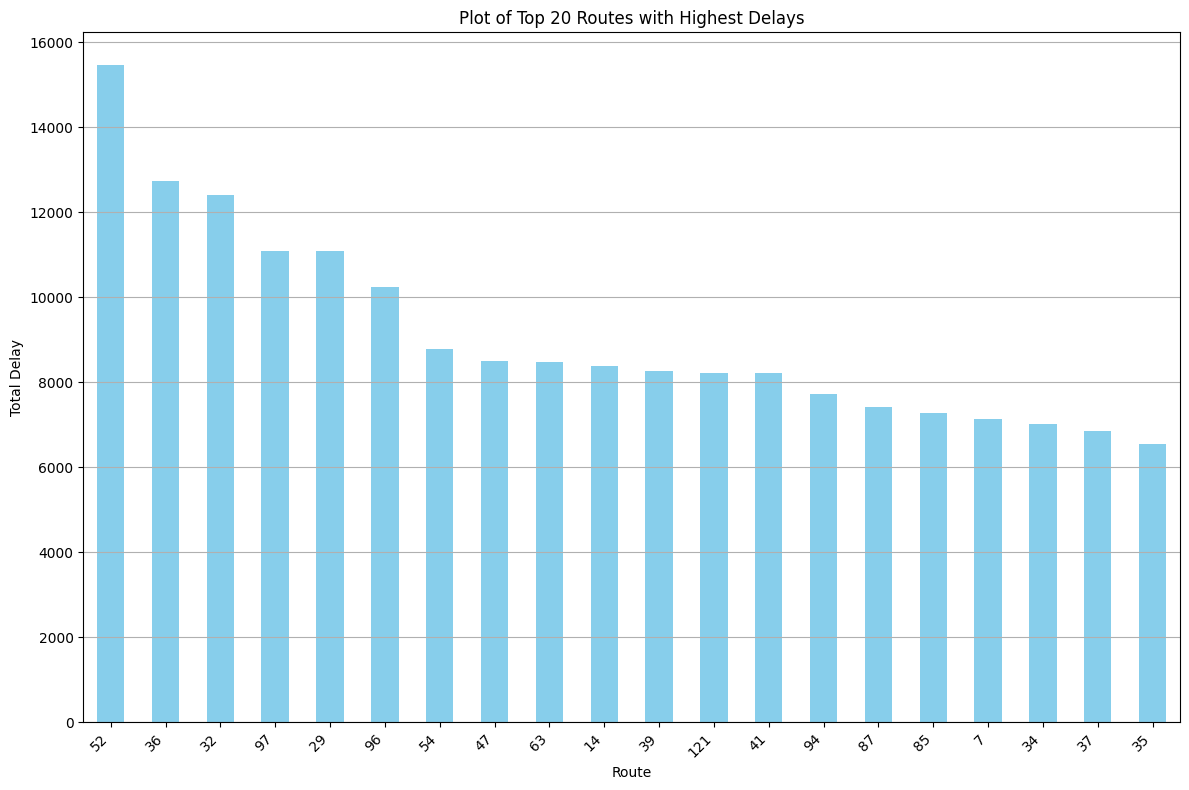

In [29]:
# lets try to plot the routes experiencing highest delays

plt.figure(figsize=(12, 8))
df.groupby('Route')['Min Delay'].sum().nlargest(20).plot(kind='bar', color='skyblue') #grouping the routes with mininum delay and picking the top 20 routes
plt.title('Plot of Top 20 Routes with Highest Delays')
plt.xlabel('Route')
plt.ylabel('Total Delay')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# The top 20 routes with the longest overall delay time are listed. Through analysis of this data,we can determine which routes are most frequently delayed.

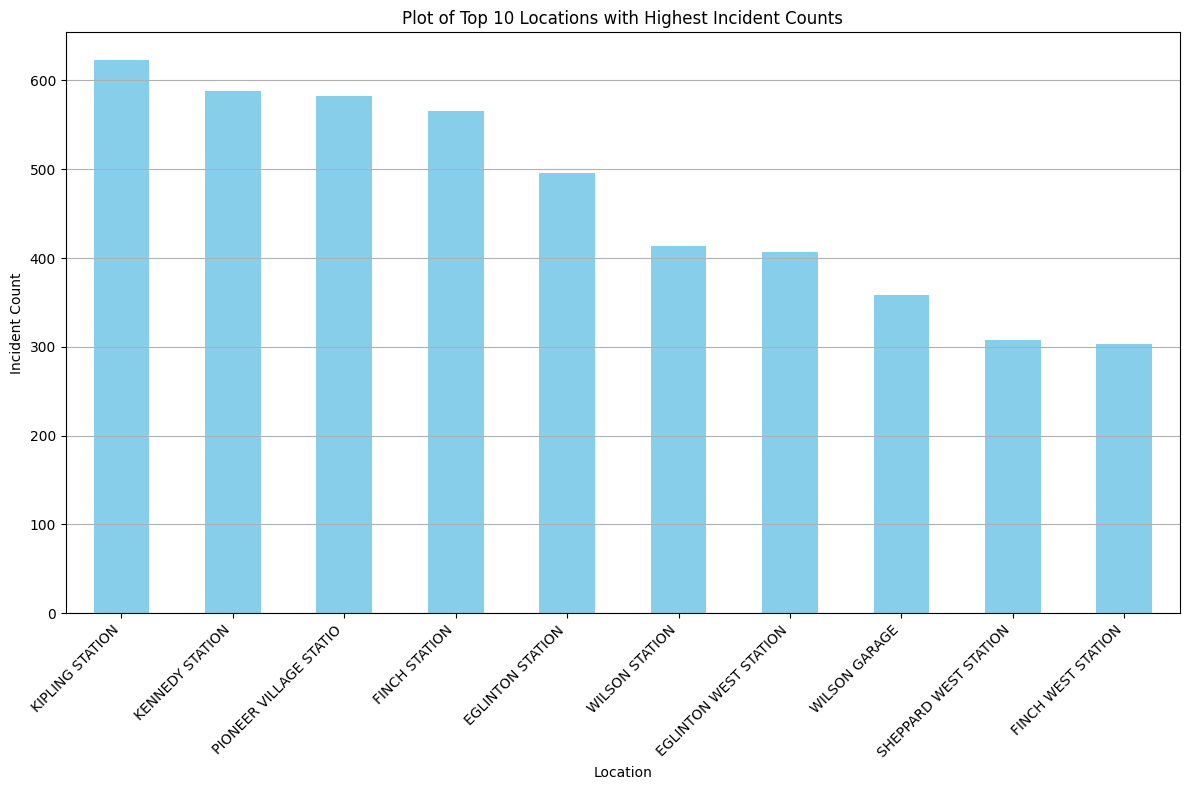

In [30]:



plt.figure(figsize=(12, 8))
df['Location'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Plot of Top 10 Locations with Highest Incident Counts')
plt.xlabel('Location')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# The top 10 sites with the highest frequency of occurrences are listed. Due to transportation operations, these areas probably see a lot of activity or traffic.

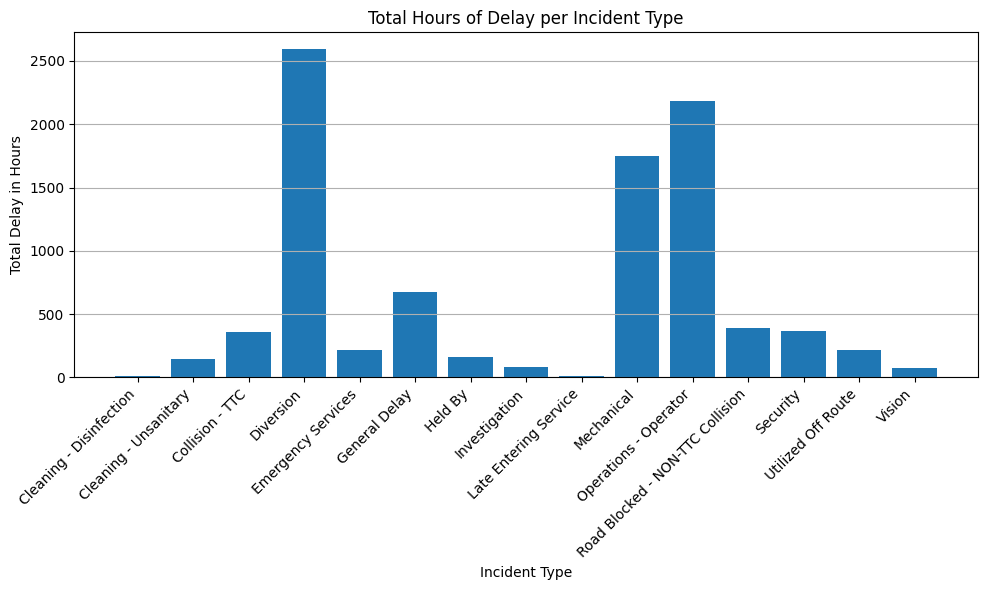

In [52]:
#  lets try to visualize the delays due to various incidents



i_d = df.groupby('Incident')['Min Delay'].sum() / 60 # /60 converts minutes to hours

d_in = pd.DataFrame({'Incident': i_d.index, 'Delay (Hours)': i_d.values})

plt.figure(figsize=(10, 6))
plt.bar(d_in['Incident'], d_in['Delay (Hours)'])
plt.title("Total Hours of Delay per Incident Type")
plt.xlabel('Incident Type')
plt.ylabel('Total Delay in Hours')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## displaying the total delay time (in hours) for every kind of occurrence, giving information on the kinds of incidents that cause the most delays in the transportation system.

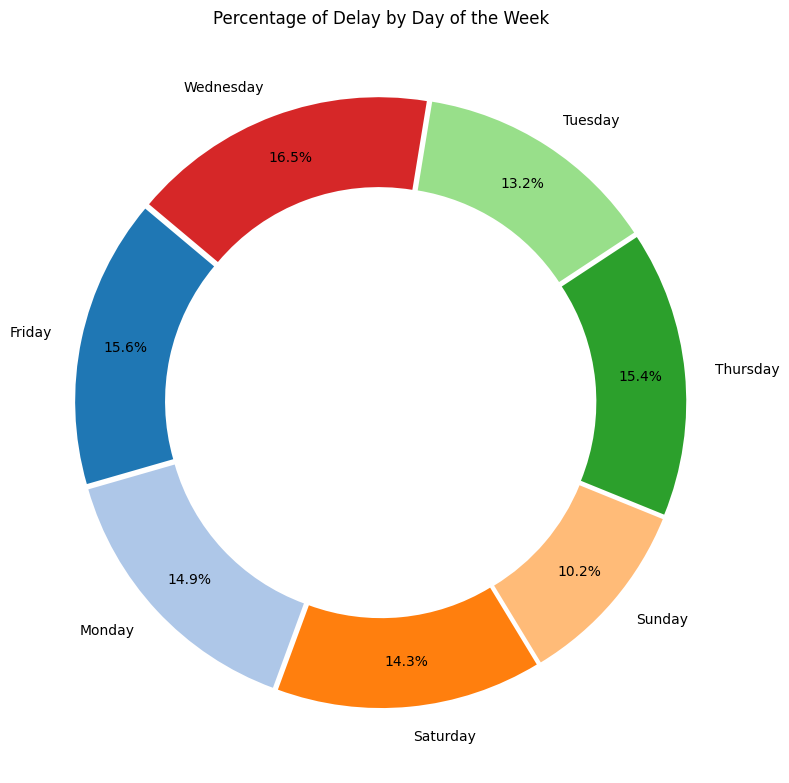

In [32]:
# lets try to plot the delays on each day of the week, so that we can determine on which day the buses are more delaying


d_delays = df.groupby('Day')['Min Delay'].sum() / 60 # diving with 60 and converting from minutes to hours

d_d = pd.DataFrame({'Day': d_delays.index, 'Delay (Hours)': d_delays.values})

plt.figure(figsize=(8, 8))
plt.pie(d_d['Delay (Hours)'], labels=d_d['Day'], autopct='%1.1f%%', startangle=140, pctdistance=0.85,
        colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.3), explode=[0.02]*len(d_d))
plt.title("Percentage of Delay by Day of the Week")
plt.axis('equal')
plt.tight_layout()
plt.show()


# The distribution of delay hours over the course of the week is shown in the pie chart. From this we can easily determine Wednesdays have the biggest delays.

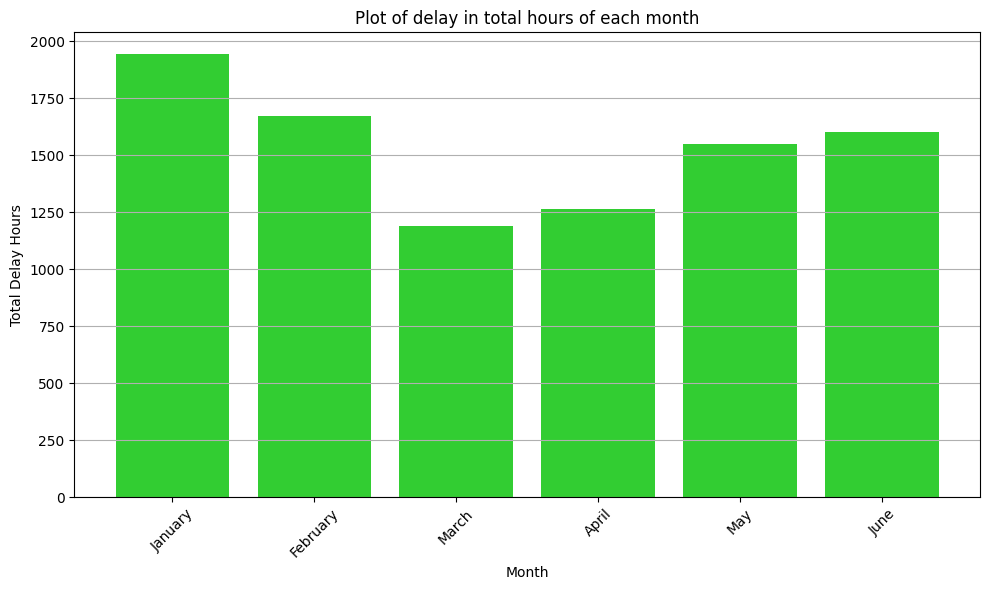

In [33]:
# lets plot the total delay hours in each month



m_d = df.groupby(df['Month'])['Min Delay'].sum() / 60

d_m = m_d.reset_index()

plt.figure(figsize=(10, 6))
plt.bar(d_m['Month'], d_m['Min Delay'], color='limegreen')
plt.title('Plot of delay in total hours of each month')
plt.xlabel('Month')
plt.ylabel('Total Delay Hours')
plt.xticks(range(1, 7), ['January', 'February', 'March', 'April', 'May', 'June'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



# these insights shows that bus delays are peak in the month of january and Febraury as the Canadian climate experience heavy snowfalls and snowstorms

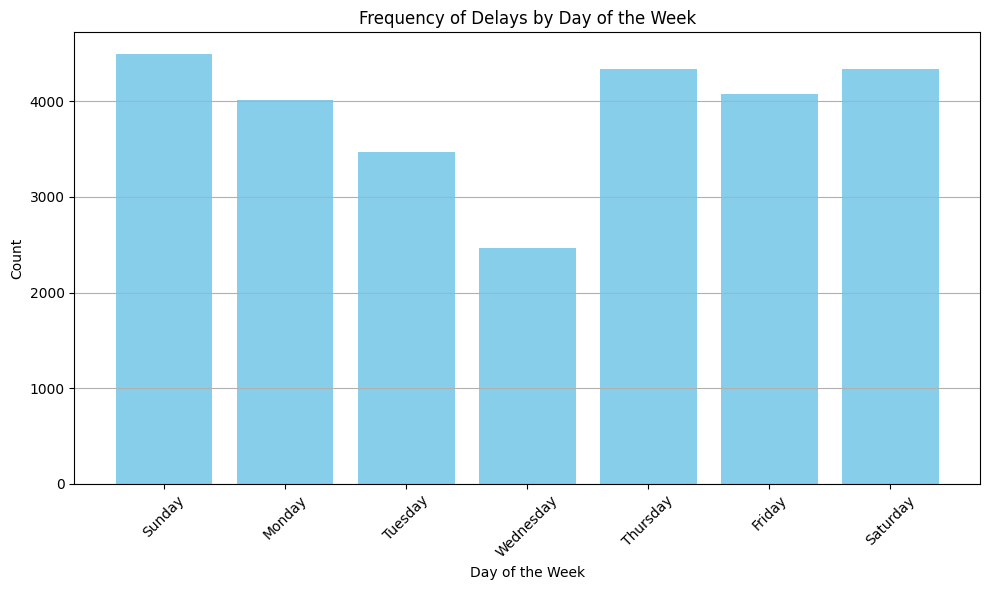

In [34]:
# lets check for which days of the week are more frequently delaying



d_c = df['Day'].value_counts().sort_index()  #

d_o = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

d_d = pd.DataFrame({'Day of the Week': d_o, 'Count': d_c})

plt.figure(figsize=(10, 6))
plt.bar(d_d['Day of the Week'], d_d['Count'], color='skyblue')
plt.title('Frequency of Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Thursdays, sundays and Saturdays  experienced more delay frequencies


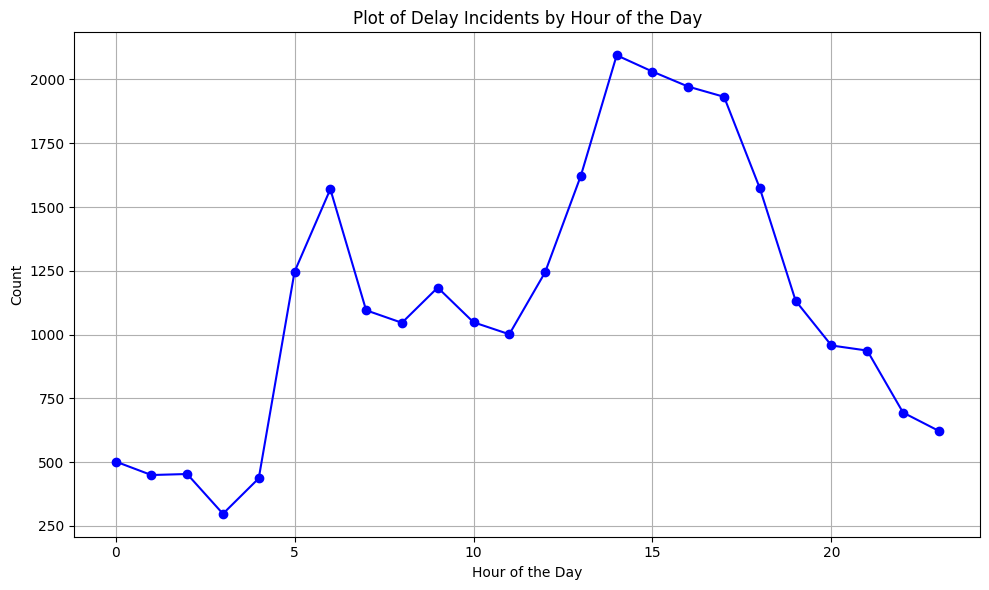

In [53]:
# lets plot the count of delay incidents by each hour of the day


h_o = df['Hour'].value_counts().sort_index()

h_d = pd.DataFrame({'Hour of the Day': h_o.index, 'Count': h_o.values})

plt.figure(figsize=(10, 6))
plt.plot(h_d['Hour of the Day'], h_d['Count'], marker='o', color='blue', linestyle='-')
plt.title('Plot of Delay Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()



# from 10th hour to 14th hour i.e from 10:00Am to 2:00 Pm , there is a sudden increase in bus delays and the peak is at 14th hour which has a delay count of approximately 2100, Whereas during the start and end of they day(At The begining and end times of TTC operations), there are very less number of delays

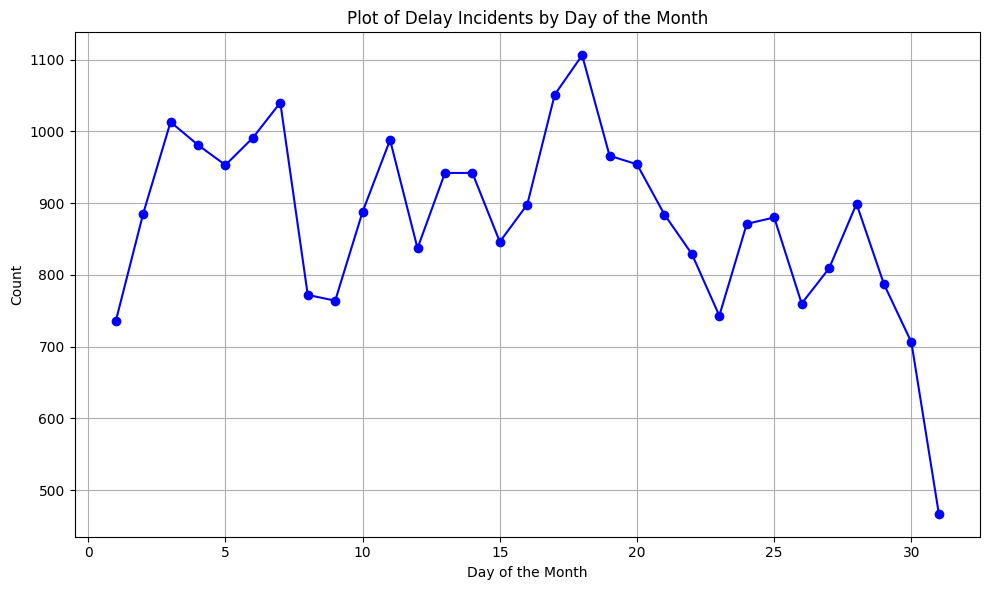

In [36]:
d_c = df['Day_Number'].value_counts().sort_index()

d_d = pd.DataFrame({'Day of the Month': d_c.index, 'Count': d_c.values})

plt.figure(figsize=(10, 6))
plt.plot(d_d['Day of the Month'], d_d['Count'], marker='o', color='blue', linestyle='-')
plt.title('Plot of Delay Incidents by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()



# Insights:

The line graph draws attention to two significant spikes in delay incidents, observed on the 7th and 18th days of the month.

These peaks might suggest particular trends or occurrences leading to elevated frequencies of delays on these specific dates.

Potential explanations for these peaks could involve heightened demand or congestion resulting from events, public holidays, or unique situations affecting the bus service, such as road closures or large public gatherings.

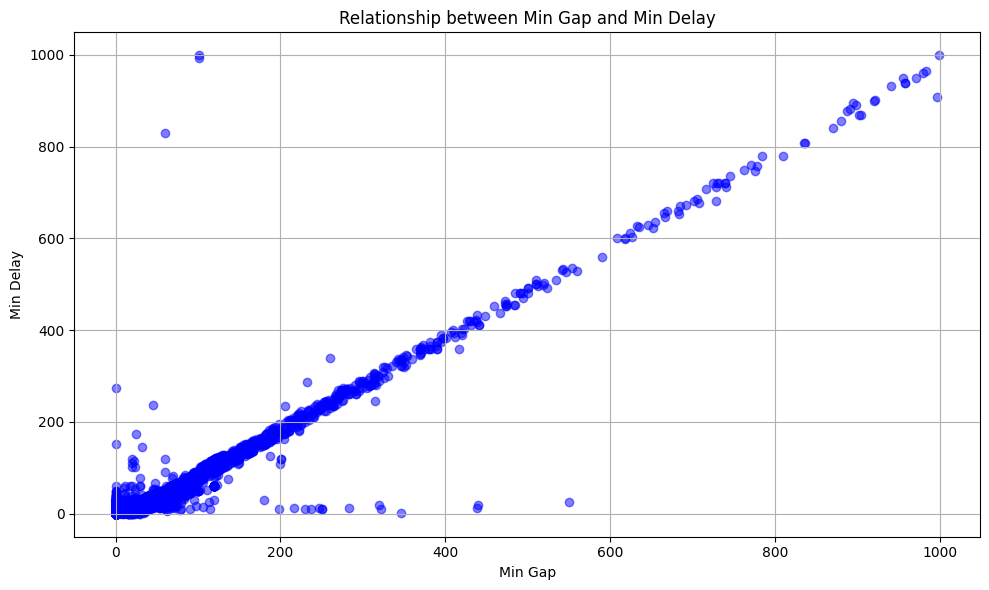

In [37]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Min Gap'], df['Min Delay'], color='blue', alpha=0.5)
plt.title('Relationship between Min Gap and Min Delay')
plt.xlabel('Min Gap')
plt.ylabel('Min Delay')
plt.grid(True)
plt.tight_layout()
plt.show()


# The scatter plot indicates a connection between delay duration (Min Delay) and the interval between buses (Min Gap), showing a positive correlation.

# This implies that when there's a longer time gap between buses, delays tend to last longer


In [38]:
df['Route'] = pd.to_numeric(df['Route'], errors='coerce') # converting the Route column into numerical datatype and converts into nan if any string values occurs

In [39]:
df.isnull().mean() # dispalys the percentage of missing values in each column

Route         0.001766
Day           0.000000
Location      0.000000
Incident      0.000000
Min Delay     0.000000
Min Gap       0.000000
Vehicle       0.000000
Year          0.000000
Month         0.000000
Day_Number    0.000000
Hour          0.000000
dtype: float64

In [40]:
df.dropna(inplace=True) # removing the records which contains missing values

In [41]:
df.isnull().sum() # rechecking again if there is any missing values present or not

Route         0
Day           0
Location      0
Incident      0
Min Delay     0
Min Gap       0
Vehicle       0
Year          0
Month         0
Day_Number    0
Hour          0
dtype: int64

In [42]:
df = df.drop(columns=['Year']) # dropping the year column

In [43]:
df.drop(columns=['Location'], inplace=True) # dropping the Location Column

# feature encoding using One hot encoding 

In [44]:
cat_col = df.select_dtypes(include=['object']).columns # storing all the categorical variable into cat_col list
df_enc = pd.get_dummies(df, columns=cat_col, drop_first=True) # converting categorical variable sinto dummy variables


In [45]:
df_enc.head() # dispalying the first five recoirds of the dataset

,Route,Min Delay,Min Gap,Vehicle,Month,Day_Number,Hour,Day_Monday,Day_Saturday,Day_Sunday,...,Incident_General Delay,Incident_Held By,Incident_Investigation,Incident_Late Entering Service,Incident_Mechanical,Incident_Operations - Operator,Incident_Road Blocked - NON-TTC Collision,Incident_Security,Incident_Utilized Off Route,Incident_Vision
0,320.0,0,0,8531,1,1,2,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,325.0,131,161,8658,1,1,2,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,320.0,17,20,0,1,1,2,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,320.0,4,11,0,1,1,2,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,320.0,4,8,0,1,1,2,False,True,False,...,False,False,False,False,False,True,False,False,False,False


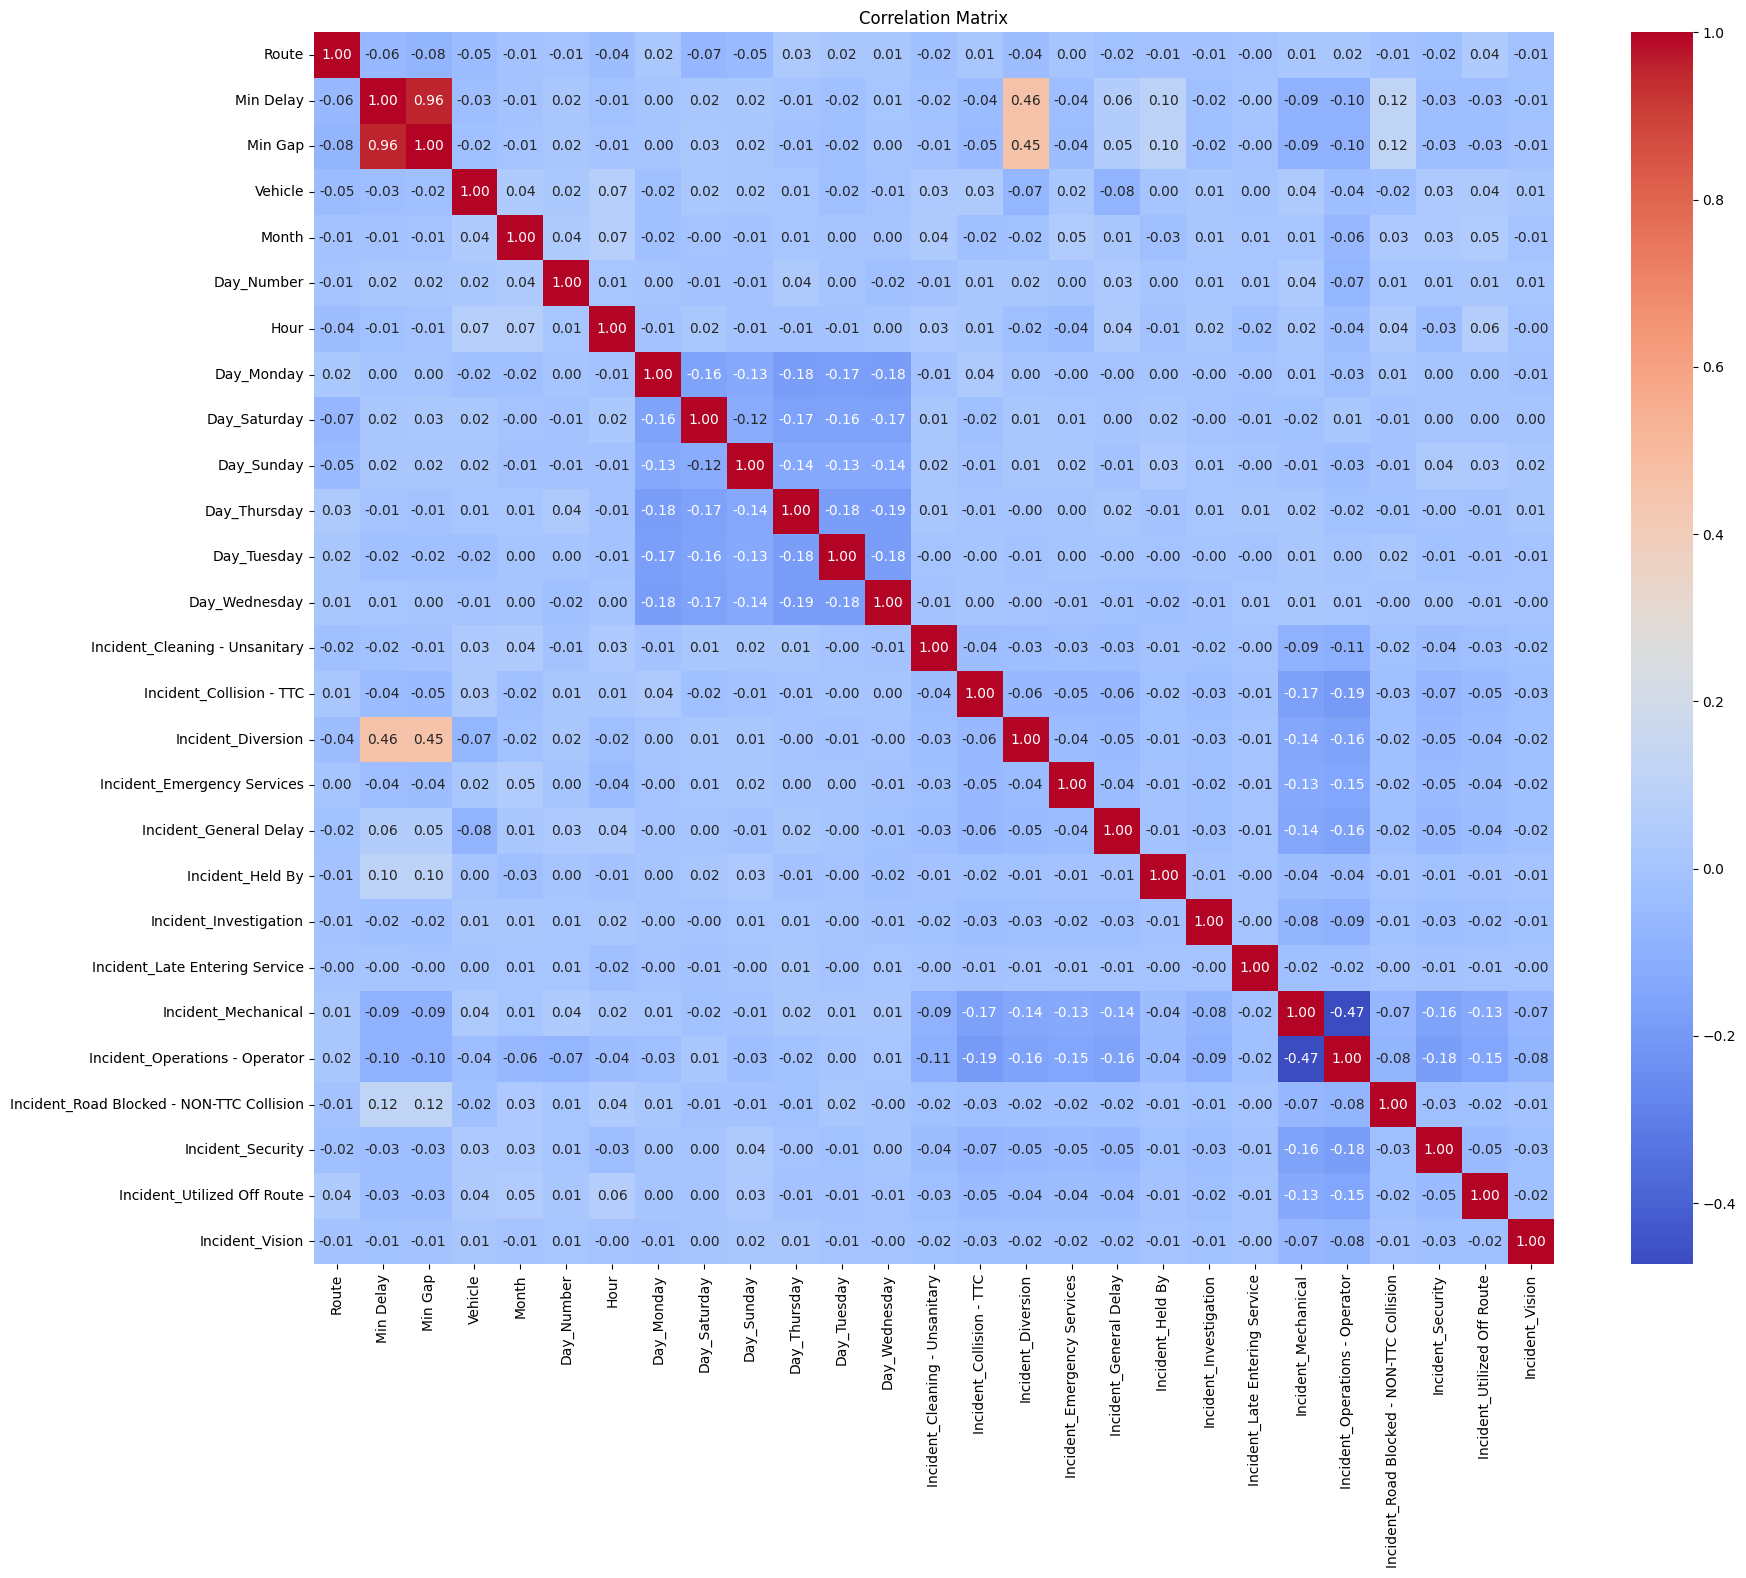

In [46]:
plt.figure(figsize=(20, 16)) # figure size in width=20 and height=12
sns.heatmap(df_enc.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Train test Split

In [47]:
from sklearn.model_selection import train_test_split # importing the library

X = df_enc.drop(columns=['Min Delay'])  # feature set
y = df_enc['Min Delay'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# spliting 80%-20%

In [48]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)# displays the size (No of rows , no of columnws)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (21711, 26)
y_train shape: (21711,)
X_test shape: (5428, 26)
y_test shape: (5428,)


# Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler # peforming feature scaling using standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model building

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

train_pred = lin_reg.predict(X_train_scaled)

train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R2):", train_r2)

test_pred = lin_reg.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_pred)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)


Training Set Metrics:
Mean Squared Error (MSE): 149.569097613898
Mean Absolute Error (MAE): 5.662419482288586
Root Mean Squared Error (RMSE): 12.229844545778086
R-squared (R2): 0.9393889712831766

Test Set Metrics:
Mean Squared Error (MSE): 386.0262027629031
Mean Absolute Error (MAE): 5.996735578249112
Root Mean Squared Error (RMSE): 19.64754953583024
R-squared (R2): 0.8393516845625296


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize the linear regression model
lin_reg = LinearRegression()

# Initialize GridSearchCV with the specified parameter grid and cross-validation
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize a new linear regression model with the best parameters
best_lin_reg = LinearRegression(fit_intercept=best_params['fit_intercept'])

# Fit the model with the best parameters to the training data
best_lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the training set
train_pred = best_lin_reg.predict(X_train_scaled)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R2):", train_r2)

# Make predictions on the test set
test_pred = best_lin_reg.predict(X_test_scaled)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_pred)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)


Best Hyperparameters: {'fit_intercept': True}
Training Set Metrics:
Mean Squared Error (MSE): 149.569097613898
Mean Absolute Error (MAE): 5.662419482288586
Root Mean Squared Error (RMSE): 12.229844545778086
R-squared (R2): 0.9393889712831766

Test Set Metrics:
Mean Squared Error (MSE): 386.0262027629031
Mean Absolute Error (MAE): 5.996735578249112
Root Mean Squared Error (RMSE): 19.64754953583024
R-squared (R2): 0.8393516845625296


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)

rfr.fit(X_train_scaled, y_train)

train_pred = rfr.predict(X_train_scaled)

train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R2):", train_r2)

test_predictions = rfr.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)



Training Set Metrics:
Mean Squared Error (MSE): 16.206372679848897
Mean Absolute Error (MAE): 0.6678016119763737
Root Mean Squared Error (RMSE): 4.025713934179737
R-squared (R2): 0.9934325677191049

Test Set Metrics:
Mean Squared Error (MSE): 362.90396299342984
Mean Absolute Error (MAE): 2.0931851532617465
Root Mean Squared Error (RMSE): 19.050038398738987
R-squared (R2): 0.8489742149543037


# hyper paramter turing using GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfr = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Importing necessary evaluation metrics

# Initialize the Random Forest Regressor with the best hyperparameters
best_rfr = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42)

# Fit the model to the scaled training data
best_rfr.fit(X_train_scaled, y_train)

# Make predictions on the training set
train_pred = best_rfr.predict(X_train_scaled)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R2):", train_r2)

# Make predictions on the test set
test_pred = best_rfr.predict(X_test_scaled)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_pred)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)


Training Set Metrics:
Mean Squared Error (MSE): 54.399361637350665
Mean Absolute Error (MAE): 1.3941850851126774
Root Mean Squared Error (RMSE): 7.37559229061305
R-squared (R2): 0.9779553308605912

Test Set Metrics:
Mean Squared Error (MSE): 354.11295932612177
Mean Absolute Error (MAE): 2.0172690872314547
Root Mean Squared Error (RMSE): 18.817889343019363
R-squared (R2): 0.8526326710903114
